### Problem Statement

You are a data scientist / AI engineer at a healthcare consulting firm. You have been provided with a dataset named **`"patient_health_data.csv"`**, which includes records of various health indicators for a group of patients. The dataset comprises the following columns:

- `age:` The age of the patient.
- `bmi:` Body Mass Index of the patient.
- `blood_pressure:` The blood pressure of the patient.
- `cholesterol:` Cholesterol levels of the patient.
- `glucose:` Glucose levels of the patient.
- `insulin:` Insulin levels of the patient.
- `heart_rate:` Heart rate of the patient.
- `activity_level:` Activity level of the patient.
- `diet_quality:` Quality of diet of the patient.
- `smoking_status:` Whether the patient smokes (Yes or No).
- `alcohol_intake:` The amount of alcohol intake by the patient.
- `health_risk_score:` A composite score representing the overall health risk of a patient.

Your task is to use this dataset to build a linear regression model to predict the health risk score based on the given predictor variables. Additionally, you will use L1 (Lasso) and L2 (Ridge) regularization techniques to improve the model's performance. 

**Import Necessary Libraries**

In [1]:
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge

### Task 1: Data Preparation and Exploration

1. Import the data from the **`"patient_health_data.csv"`** file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset and handle them appropriately.
5. Encode the categorical variable `'smoking_status'` by converting 'Yes' to 1 and 'No' to 0.

In [10]:
df=pd.read_csv("patient_health_data.csv")
print(df.shape)
df.head()

(250, 12)


,age,bmi,blood_pressure,cholesterol,glucose,insulin,heart_rate,activity_level,diet_quality,smoking_status,alcohol_intake,health_risk_score
0,58,24.865215,122.347094,165.730375,149.289441,22.306844,75.866391,1.180237,7.675409,No,0.824123,150.547752
1,71,19.103168,136.852028,260.610781,158.584646,13.869817,69.481114,7.634622,8.933057,No,0.852910,160.320350
2,48,22.316562,137.592457,177.342582,178.760166,22.849816,69.386962,7.917398,3.501119,Yes,4.740542,187.487398
3,34,22.196893,153.164775,234.594764,136.351714,15.140336,95.348387,3.192910,2.745585,No,2.226231,148.773138
4,62,29.837173,92.768973,276.106498,158.753516,17.228576,77.680975,7.044026,8.918348,No,3.944011,170.609655


In [3]:
df.isnull().sum()
# hence no missing values in the dataset

age                  0
bmi                  0
blood_pressure       0
cholesterol          0
glucose              0
insulin              0
heart_rate           0
activity_level       0
diet_quality         0
smoking_status       0
alcohol_intake       0
health_risk_score    0
dtype: int64

In [11]:
df["smoking_status"]=df["smoking_status"].apply(lambda x: 1 if x=="Yes" else 0)


### Task 2: Train Linear Regression Models

1. Select the features and the target variable for modeling.
2. Split the data into training and test sets with a test size of 25%.
3. Initialize and train a Linear Regression model, and evaluate its performance using R-squared.
4. Initialize and train a Lasso Regression model with various alpha values provided in a list: [0.01, 0.1, 1.0, 10.0], and evaluate its performance using R-squared.
5. Initialize and train a Ridge Regression model with various alpha values provided in a list: [0.01, 0.1, 1.0, 10.0], and evaluate its performance using R-squared.

In [17]:
X=df.drop(["health_risk_score"],axis=1)
y=df["health_risk_score"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

X_train.shape,X_test.shape


((187, 11), (63, 11))

In [21]:
linear_model=LinearRegression()

linear_model.fit(X_train,y_train)
y_pred=linear_model.predict(X_test)
linear_r2=linear_model.score(X_test,y_test)
linear_r2

0.764362090675749

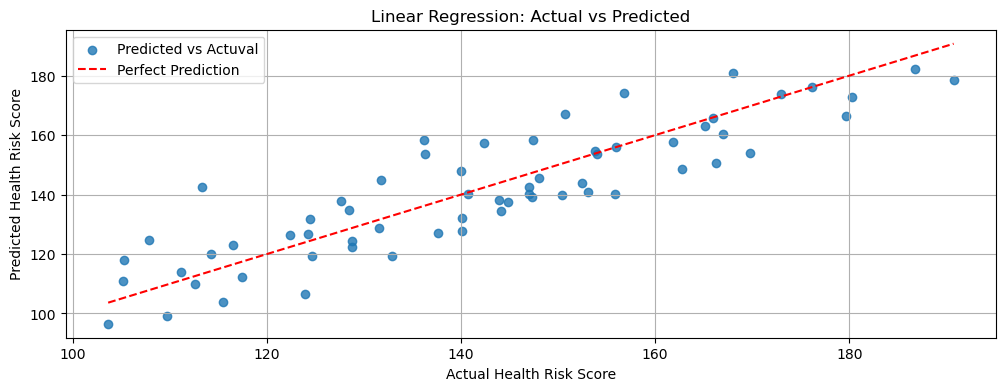

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.scatter(y_test,y_pred,alpha=0.8,label="Predicted vs Actuval")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Health Risk Score')
plt.ylabel('Predicted Health Risk Score')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# polynomail regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

poly.fit(X_train,y_train)
y_poly_pred=poly.predict(X_test)

r2_score(y_test,y_poly_pred)

0.558572486615631

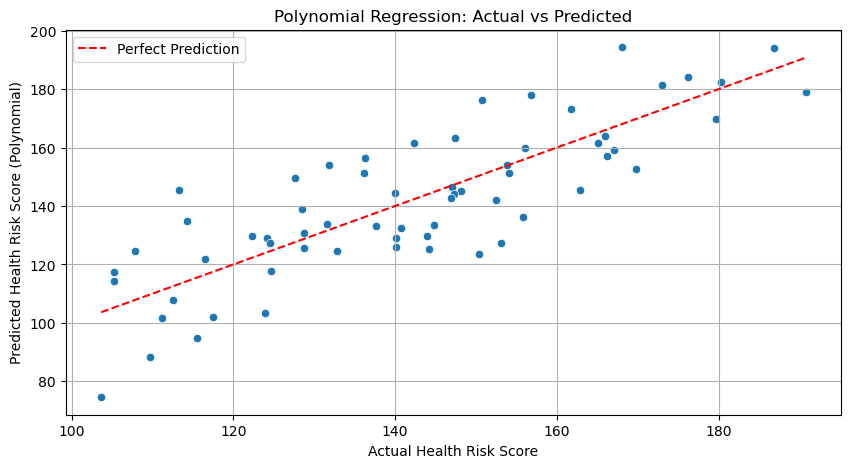

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_poly_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Health Risk Score")
plt.ylabel("Predicted Health Risk Score (Polynomial)")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


In [43]:
def lasso_check(alpha):
    lasso=Lasso(alpha)
    lasso.fit(X_train,y_train)
    lasso_r2=lasso.score(X_test,y_test)
    return lasso_r2

lasso_test=[0.01, 0.1, 1.0, 10.0]

for alpha in lasso_test:
    print(f"The r2 score for the alpha value {alpha} of Lasso model is: {lasso_check(alpha)}")


The r2 score for the alpha value 0.01 is: 0.7645437646395714
The r2 score for the alpha value 0.1 is: 0.7660509914802163
The r2 score for the alpha value 1.0 is: 0.7819763683575138
The r2 score for the alpha value 10.0 is: 0.7873364302158368


In [47]:
def ridge_check(alpha):
    ridge=Ridge(alpha)
    ridge.fit(X_train,y_train)
    ridge_r2=ridge.score(X_test,y_test)
    return ridge_r2

In [48]:
ridge_test=[0.01, 0.1, 1.0, 10.0]

for alpha in ridge_test:
    print(f"The r2 score for the alpha value {alpha} of Ridge model is: {ridge_check(alpha)}")

The r2 score for the alpha value 0.01 of Ridge model is: 0.7643631589390539
The r2 score for the alpha value 0.1 of Ridge model is: 0.7643727707489342
The r2 score for the alpha value 1.0 of Ridge model is: 0.7644686367656158
The r2 score for the alpha value 10.0 of Ridge model is: 0.7654030812954538
